In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris_dict = {'setosa':0, 'versicolor':1, 'virginica':2}
df['species_num'] = [iris_dict[i] for i in df['species']]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [9]:
df['species_num'].unique()

array([0, 1, 2], dtype=int64)

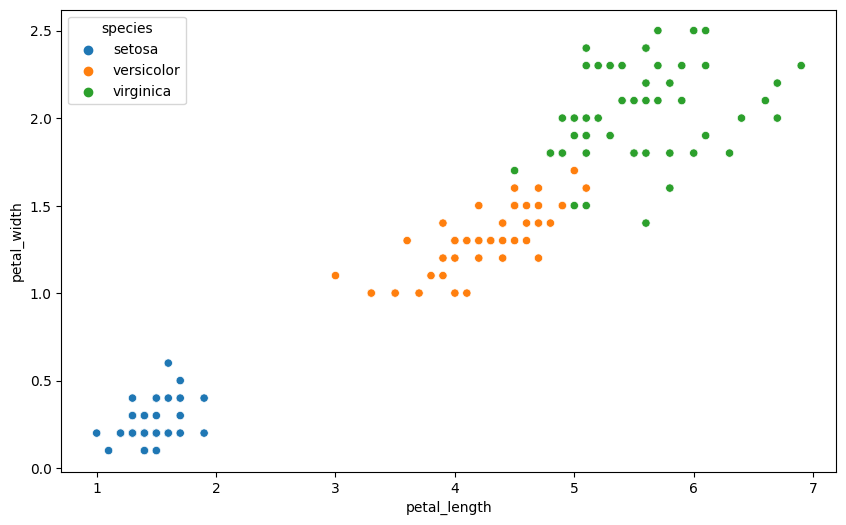

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(df,x='petal_length',y='petal_width',hue='species')
plt.show()

In [13]:
X = df.drop(columns=['species',	'species_num'], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df['species_num']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [19]:
model.fit(X_train,y_train)

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [21]:
yhat_test = model.predict(X_test)
yhat_test[0:5]

array([2, 1, 0, 2, 0], dtype=int64)

In [22]:
yhat_test_proba = model.predict_proba(X_test)
yhat_test_proba[0:5]

array([[1.13366965e-04, 5.89593567e-02, 9.40927276e-01],
       [1.22337846e-02, 9.64612873e-01, 2.31533426e-02],
       [9.86694862e-01, 1.33051047e-02, 3.29344972e-08],
       [1.20752890e-06, 2.31386308e-02, 9.76860162e-01],
       [9.72072400e-01, 2.79274676e-02, 1.32013192e-07]])

In [23]:
# Kiểm tra độ chính xác
model.score(X_test,y_test)

1.0

In [24]:
model.score(X_train,y_train)

0.9666666666666667

In [ ]:
pd.Data

In [29]:
df_new = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,'Predict': pd.DataFrame(yhat_test)[0].values})

In [30]:
df_new.head(10)

,Actual,Predict
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
